# Demo Time Series Nuclear Power France

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
gold=pd.read_csv('gold.csv', sep=',').drop(['Currency','High','Low','Close','Volume'],axis=1)
gold['Date']=pd.to_datetime(gold['Date'], )
gold=gold.set_index('Date')[:-1]
gold

,Open
Date,
2000-01-04,289.5
2000-01-05,283.7
2000-01-06,281.6
2000-01-07,282.5
2000-01-10,282.4
...,...
2022-08-26,1771.8
2022-08-29,1748.4
2022-08-30,1749.8


In [5]:
testset=trainset.iloc[-49:]
testset

,Valeur (GW)
Date,
2024-02-01,48.94804
2024-02-02,49.06049
2024-02-03,45.53645
2024-02-04,45.02441
2024-02-05,46.83975
2024-02-06,48.62854
2024-02-07,48.45267
2024-02-08,48.18729
2024-02-09,47.32187


In [6]:
trainset=trainset.iloc[:-49]
trainset

,Valeur (GW)
Date,
2019-01-01,49.71679
2019-01-02,53.30583
2019-01-03,53.51208
2019-01-04,53.57083
2019-01-05,53.64708
...,...
2024-01-27,49.21013
2024-01-28,48.67601
2024-01-29,48.15625


In [5]:
trainset_weekly=gold.resample('W').mean()
trainset_monthly=gold.resample('M').mean()

<Axes: title={'center': 'monthly'}, xlabel='Date'>

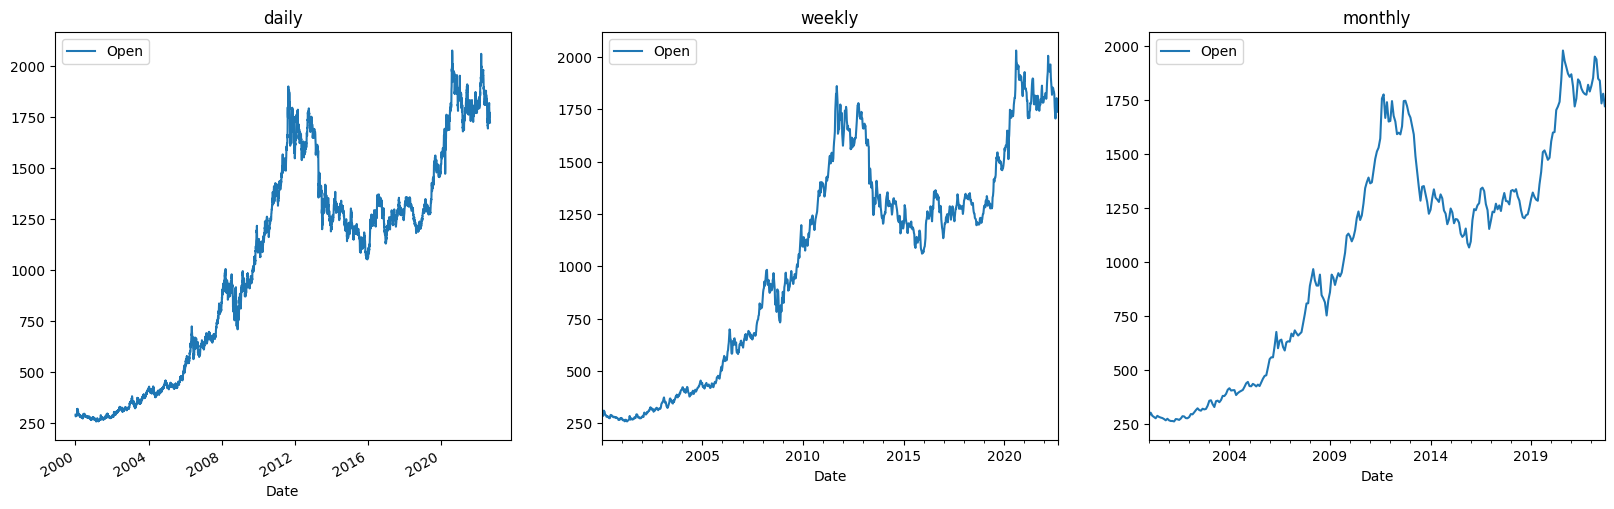

In [6]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(20,6))
trainset.plot(ax=ax[0],title='daily')
trainset_weekly.plot(ax=ax[1],title='weekly')
trainset_monthly.plot(ax=ax[2],title='monthly')

In [7]:
trainset_monthly['nm_m']=trainset_monthly.index.map(lambda x: str(x).split('-')[1])
months=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
trainset_monthly['month']=trainset_monthly.nm_m.map(lambda x: months[int(x)-1])

In [8]:
trainset_monthly

,Open,nm_m,month
Date,,,
2000-01-31,286.136842,01,jan
2000-02-29,302.290000,02,feb
2000-03-31,287.895652,03,mar
2000-04-30,282.352632,04,apr
2000-05-31,276.354545,05,may
...,...,...,...
2022-05-31,1850.680952,05,may
2022-06-30,1841.338095,06,jun
2022-07-31,1735.935000,07,jul


In [13]:
BBT=pd.DataFrame(index=range(15),columns=range(12))
for i in range(15):
    BBT.iloc[i,:]=trainset_monthly.iloc[12*i:12*(1+i),:].sort_values('Open')['month']
BBT

,0,1,2,3,4,5,6,7,8,9,10,11
0,nov,oct,dec,may,sep,aug,apr,jul,jan,jun,mar,feb
1,apr,mar,feb,jan,jul,jun,may,aug,dec,nov,oct,sep
2,jan,mar,feb,apr,aug,may,jul,oct,nov,sep,jun,dec
3,apr,mar,jul,may,jan,jun,feb,aug,oct,sep,nov,dec
4,may,jun,jul,aug,feb,mar,apr,sep,jan,oct,nov,dec
5,may,feb,jan,jul,apr,jun,mar,aug,sep,oct,nov,dec
6,jan,mar,feb,oct,jun,sep,apr,nov,dec,jul,aug,may
7,jan,mar,jun,jul,feb,may,aug,apr,sep,oct,nov,dec
8,nov,oct,dec,sep,aug,jan,jun,may,apr,feb,jul,mar
9,jan,apr,may,mar,jul,feb,jun,aug,sep,oct,nov,dec


on recupère les valeurs 

In [14]:
dfm=pd.DataFrame(index=range(15),columns=months)
for i in range(15):
    dfm.iloc[i,:]=trainset_monthly['Open'].iloc[12*i:12*(1+i)]
dfm

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,286.136842,302.29,287.895652,282.352632,276.354545,287.595455,282.610526,279.573913,277.26,272.722727,266.865,274.02
1,266.733333,263.652632,263.622727,261.66,272.618182,271.642857,268.666667,275.108696,285.823529,284.73913,276.895,276.489474
2,281.919048,295.878947,294.535,303.895455,314.168182,322.47,314.271429,311.445455,320.435,317.382609,319.494737,334.233333
3,357.37619,359.642105,341.380952,328.457143,355.47619,357.985714,350.740909,360.966667,380.047619,379.456522,389.383333,408.538095
4,415.494737,404.831579,406.382609,406.761905,384.015,392.971429,398.938095,403.404545,407.652381,421.961905,438.265,444.871429
5,425.52,424.726316,435.75,431.038095,424.004762,432.35,425.585,442.878261,459.542857,472.614286,475.735,511.685714
6,550.405,559.168421,558.743478,612.805263,676.504545,600.990909,636.257895,640.934783,606.77619,590.463636,628.3,633.255
7,631.490476,668.91,656.368182,683.79,670.536364,659.804762,667.672727,675.491304,718.335,759.621739,808.422727,809.455
8,889.771429,927.305,967.665,915.5,891.481818,891.271429,942.243478,847.07619,832.285714,813.565217,752.847368,822.718182
9,860.715,942.194737,928.236364,894.319048,924.96,948.986364,934.018182,951.638095,996.714286,1043.45,1122.725,1132.3


In [15]:
season_correctedm=dfm.mean()-dfm.mean(axis=0).sum()/len(dfm.mean())
season_correctedm

jan   -24.874863
feb    -6.617636
mar    -6.882421
apr   -13.356105
may   -11.840615
jun   -15.308559
jul   -13.931779
aug     3.296706
sep    18.938589
oct    17.803947
nov    25.318998
dec    27.453739
dtype: object

In [16]:
trainset['no_seasonm']=trainset['Open']
for mon in season_correctedm.index:
    for year in range(5):
        trainset['no_seasonm'].loc[f'{2019+year}-{mon}']=trainset['no_seasonm'].loc[f'{2019+year}-{mon}']-season_correctedm[mon]
trainset

KeyError: '2023-jan'

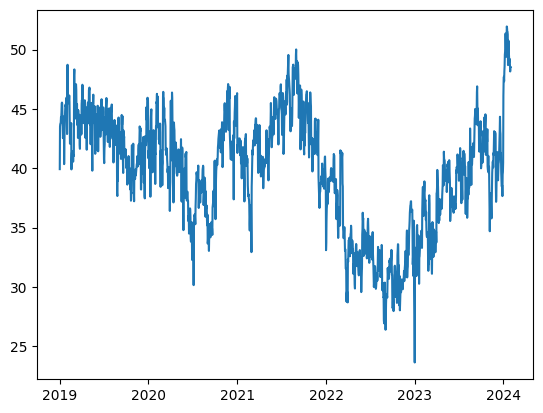

In [15]:
plt.plot(trainset.no_seasonm)

In [17]:
trainset_monthly['nm_q']=trainset_monthly.nm_m.map(lambda x: (int(x)-1)//3+1)
trainset_monthly

,Open,nm_m,month,nm_q
Date,,,,
2000-01-31,286.136842,01,jan,1
2000-02-29,302.290000,02,feb,1
2000-03-31,287.895652,03,mar,1
2000-04-30,282.352632,04,apr,2
2000-05-31,276.354545,05,may,2
...,...,...,...,...
2022-05-31,1850.680952,05,may,2
2022-06-30,1841.338095,06,jun,2
2022-07-31,1735.935000,07,jul,3


In [18]:
trainset_quarterly = trainset.resample('Q').mean()
trainset_quarterly['nm_q']=trainset_monthly.nm_q
trainset_quarterly

,Open,no_seasonm,nm_q
Date,,,
2000-03-31,292.000000,292.000000,1
2000-06-30,282.088889,282.088889,2
2000-09-30,279.758065,279.758065,3
2000-12-31,271.251613,271.251613,4
2001-03-31,264.685484,264.685484,1
...,...,...,...
2021-09-30,1791.146875,1791.146875,3
2021-12-31,1796.460938,1796.460938,4
2022-03-31,1879.346774,1887.370924,1


In [20]:
BBTq=pd.DataFrame(index=range(15),columns=range(5)[1:])
for i in range(15):
    BBTq.iloc[i,:]=trainset_quarterly.iloc[4*i:4*(1+i),:].sort_values('Open')['nm_q']
BBTq

,1,2,3,4
0,4,3,2,1
1,1,2,3,4
2,1,2,3,4
3,2,1,3,4
4,2,3,1,4
5,1,2,3,4
6,1,4,3,2
7,1,2,3,4
8,4,3,2,1
9,1,2,3,4


In [21]:
df=pd.DataFrame(index=range(15),columns=range(5)[1:])
for i in range(15):
    df.iloc[i,:]=trainset_quarterly['Open'].iloc[4*i:4*(1+i)]
df

,1,2,3,4
0,292.0,282.088889,279.758065,271.251613
1,264.685484,268.814286,275.877049,279.680645
2,290.545,313.23125,315.24127,323.636508
3,352.57541,347.306349,363.7125,392.18871
4,408.737705,394.753226,403.332812,434.980645
5,428.962295,429.18125,442.942187,486.854839
6,556.183871,630.92381,628.138095,616.660317
7,652.057143,671.166667,686.027692,791.472308
8,927.616393,899.543077,875.972308,798.685938
9,910.445902,923.136508,960.371875,1098.765625


In [22]:
season_corrected=df.mean()-df.mean(axis=0).sum()/len(df.mean())
season_corrected

1   -12.850203
2   -13.423774
3     2.590921
4    23.683056
dtype: object

In [23]:
season_corrected.sum()

-4.547473508864641e-13

In [35]:
trainset['no_season']=trainset['Valeur (GW)']
for quarter in season_corrected.index:
    for year in range(4):
        trainset['no_season'].loc[f'{2019+year}-{quarter}']=trainset['no_season'].loc[f'{2019+year}-{quarter}']-season_corrected[quarter]
trainset

C:\Users\fraga\AppData\Local\Temp\ipykernel_228\2877742374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset['no_season']=trainset['Valeur (GW)']
C:\Users\fraga\AppData\Local\Temp\ipykernel_228\2877742374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset['no_season'].loc[f'{2019+year}-{quarter}']=trainset['no_season'].loc[f'{2019+year}-{quarter}']-season_corrected[quarter]


,Valeur (GW),no_season
Date,,
2019-01-01,49.71679,43.274914
2019-01-02,53.30583,46.863954
2019-01-03,53.51208,47.070204
2019-01-04,53.57083,47.128954
2019-01-05,53.64708,47.205204
...,...,...
2024-01-27,49.21013,49.210130
2024-01-28,48.67601,48.676010
2024-01-29,48.15625,48.156250


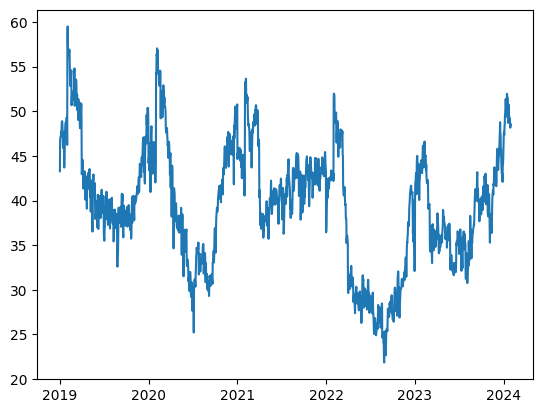

In [36]:
plt.plot(trainset.no_season)

In [22]:
from sklearn.linear_model import LinearRegression
modeleReg=LinearRegression()
modeleReg.fit(np.array(range(len(trainset))).reshape(-1,1),trainset.no_seasonm)

LinearRegression()

In [18]:
coef=modeleReg.coef_
intercept=modeleReg.intercept_
coef, intercept

(array([-0.00341456]), 42.91467924626927)

In [19]:
trend=coef*np.array(range(len(trainset))).reshape(-1,1)+intercept
trend=np.hstack(trend)
trend

array([42.91467925, 42.91126469, 42.90785013, ..., 36.58409015,
       36.58067559, 36.57726104])

In [20]:
trainset['residual']=trainset.no_seasonm-trend
trainset

C:\Users\maxvi\AppData\Local\Temp\ipykernel_8344\2364312295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset['residual']=trainset.no_seasonm-trend


,Valeur (GW),no_seasonm,residual
Date,,,
2019-01-01,49.71679,39.923676,-2.991003
2019-01-02,53.30583,43.512716,0.601451
2019-01-03,53.51208,43.718966,0.811116
2019-01-04,53.57083,43.777716,0.873280
2019-01-05,53.64708,43.853966,0.952945
...,...,...,...
2024-01-27,49.21013,49.210130,12.619211
2024-01-28,48.67601,48.676010,12.088505
2024-01-29,48.15625,48.156250,11.572160


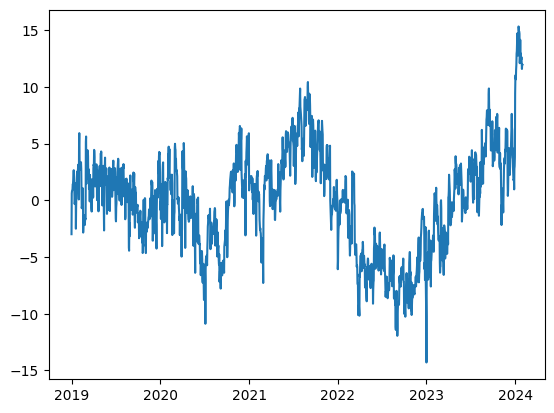

In [21]:
plt.plot(trainset.residual)

In [51]:
trainset.residual.describe()

count    1.857000e+03
mean     3.244697e-15
std      4.503632e+00
min     -1.429683e+01
25%     -3.040663e+00
50%      2.332599e-01
75%      2.812643e+00
max      1.531603e+01
Name: residual, dtype: float64

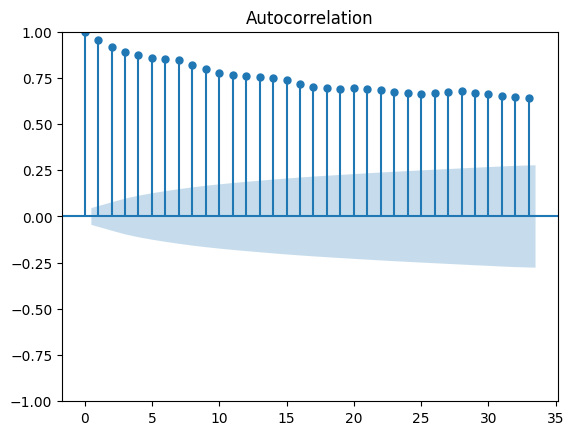

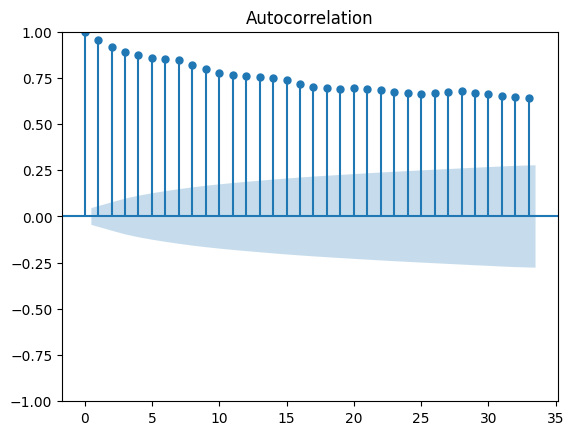

In [53]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(trainset.residual)

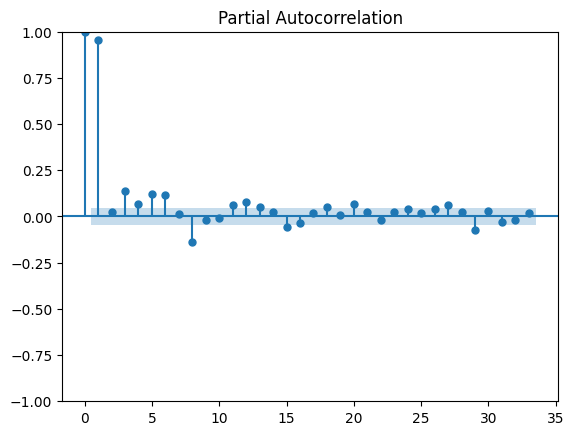

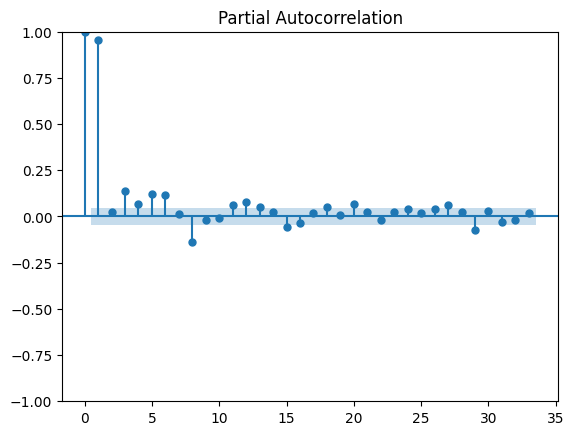

In [54]:
plot_pacf(trainset.residual)

In [55]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(trainset.residual, order=(2,1,7))
res=model.fit()
res.summary()

C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCac

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               residual   No. Observations:                 1857
Model:                 ARIMA(2, 1, 7)   Log Likelihood               -3002.066
Date:                Tue, 23 Apr 2024   AIC                           6024.133
Time:                        13:51:07   BIC                           6079.395
Sample:                    01-01-2019   HQIC                          6044.501
                         - 01-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2428      0.003    442.408      0.000       1.237       1.248
ar.L2         -0.9952      0.003   -373.733      0.000      -1.000      -0.990
ma.L1         -1.3770      0.020    -69.560      0.000      -1.416      -1.338
ma.L2          0.9903      0.036     27.631      0.000       0.920       1.061
ma.L3          0.0524      0.042      1.236      0.216      -0.031       0.136
ma.L4         -0.1997      0.044     -4.519      0.000      -0.286      -0.113
ma.L5         -0.0102      0.046     -0.221      0.825      -0.101       0.080
ma.L6          0.0222      0.039      0.571      0.568      -0.054       0.099
ma.L7         -0.0566      0.022     -2.535      0.011      -0.100      -0.013
sigma2         1.4809      0.031     47.755      0.000       1.420       1.542
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1025.49
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(trainset.residual, order=(1,1,6))
model = arima_model.fit()
#print(model.summary())
testset['residual_pred'] = model.forecast(len(testset))
testset

C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\fraga\AppData\Local\Temp\ipykernel_228\3634655582.py:5: SettingWithCopyWarning: 
A value

,Valeur (GW),residual_pred
Date,,
2024-02-01,48.94804,12.038323
2024-02-02,49.06049,12.165272
2024-02-03,45.53645,12.175708
2024-02-04,45.02441,12.146854
2024-02-05,46.83975,12.151345
2024-02-06,48.62854,12.144888
2024-02-07,48.45267,12.142644
2024-02-08,48.18729,12.141864
2024-02-09,47.32187,12.141593


In [61]:
testset['residual_pred'].describe()

count    49.000000
mean     12.140949
std       0.016140
min      12.038323
25%      12.141449
50%      12.141449
75%      12.141449
max      12.175708
Name: residual_pred, dtype: float64

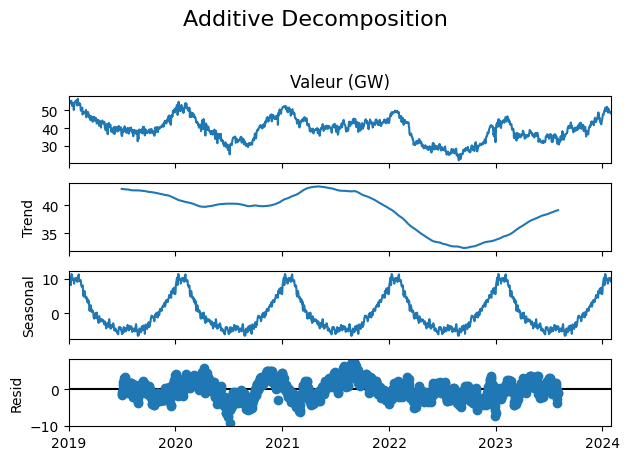

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

additive_decomposition = seasonal_decompose(trainset['Valeur (GW)'], model="additive",period=365)

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()